# Criando os nomes

In [102]:
import pandas as pd

In [103]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [104]:
print("Quantidades de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidades de nomes: 400


In [105]:
frames = [nomes_f,  nomes_m]

In [106]:
nomes = pd.concat(frames)['nome'].to_frame()

In [107]:
nomes.sample(5)

,nome
116,DOMINGOS
116,MARCELA
79,VALDIR
9,MARCOS
120,JOSIANE


# Incluindo ID dos alunos 

In [108]:
import numpy as np

In [109]:
np.random.seed(123)

In [110]:
total_alunos = len(nomes)
total_alunos

400

In [111]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1 

In [112]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [113]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [114]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [115]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [116]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


## Criando a tabela Curso

In [117]:
#!pip3 install html5lib
#!pip3 install lxml

In [118]:
import html5lib

In [119]:
curso = pd.read_html('https://tabela-cursos.herokuapp.com/index.html')

In [120]:
curso = curso[0]

In [121]:
curso

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [122]:
cursos = curso.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [123]:
cursos['id'] = cursos.index +1

In [124]:
cursos = cursos.set_index('id')

In [125]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


## Matriculando os alunos nos cursos

In [126]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [127]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [128]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,1


In [129]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [130]:
import seaborn as sns

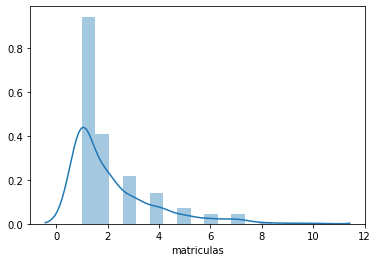

In [131]:
sns.distplot(nomes.matriculas)

In [132]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
10      1
9       1
Name: matriculas, dtype: int64

## Selecionando cursos

In [133]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [134]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [135]:
matriculas

,id_aluno,id_curso
0,235,19
1,235,6
2,43,16
3,43,18
4,43,11
...,...,...
854,383,11
855,366,11
856,366,1
857,366,9


In [136]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,78,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python
6,36,PHP com MySql
7,38,.NET para web
8,16,Novas integrações com Java
9,42,TDD com Java


In [137]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
52,LUZIA,276,@servicodoemail.com,luzia@servicodoemail.com,1
115,MILTON,104,@servicodoemail.com,milton@servicodoemail.com,1
122,ADAO,234,@dominiodoemail.com.br,adao@dominiodoemail.com.br,1


In [138]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [139]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,235,6
2,43,16
3,43,18
4,43,11


In [140]:
matriculas_por_cursos = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
matriculas_por_cursos

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,78,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python
6,36,PHP com MySql
7,38,.NET para web
8,16,Novas integrações com Java
9,42,TDD com Java


## Saídas em diferentes formatos

In [141]:
matriculas_por_cursos.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,78,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python


In [142]:
matriculas_por_cursos.to_csv('matriculas_por_cursos.csv', index=False)

In [143]:
matriculas_json = matriculas_por_cursos.to_json()

In [144]:
matriculas_json

'{"quantidade_de_alunos":{"1":78,"2":4,"3":32,"4":68,"5":17,"6":36,"7":38,"8":16,"9":42,"10":68,"11":58,"12":87,"13":17,"15":23,"16":74,"17":13,"18":65,"19":81,"20":42},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [145]:
matriculas_html = matriculas_por_cursos.to_html()

## Criando o banco sql

In [146]:
!pip install sqlalchemy

In [148]:
from sqlalchemy import create_engine, MetaData, Table

In [149]:
engine = create_engine('sqlite:///:memory:')

In [150]:
engine

Engine(sqlite:///:memory:)

In [151]:
type(engine)

sqlalchemy.engine.base.Engine

In [153]:
matriculas_por_cursos.to_sql('matriculas', engine)

In [155]:
print(engine.table_names())

['matriculas']


## Buscando do banco sql

In [156]:
query ='select * from matriculas where quantidade_de_alunos < 20'

In [157]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,4,Java para Web
1,5,17,Cursos de Python
2,8,16,Novas integrações com Java
3,13,17,Persistência com .NET
4,17,13,Internet das coisas


In [159]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,78
1,Java para Web,4
2,C# para Web,32
3,Ruby on Rails,68
4,Cursos de Python,17
5,PHP com MySql,36
6,.NET para web,38
7,Novas integrações com Java,16
8,TDD com Java,42
9,Código limpo com C#,68


In [160]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [161]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,78
1,Java para Web,4
2,C# para Web,32
3,Ruby on Rails,68
4,Cursos de Python,17
5,PHP com MySql,36
6,.NET para web,38
7,Novas integrações com Java,16
8,TDD com Java,42
9,Código limpo com C#,68


In [164]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [165]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
11,Hardware básico,87
17,Boas práticas em Java,81


## Escrevendo no banco

In [203]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

ValueError: Table 'muitas_matriculas' already exists.

In [204]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


## Nomes dos alunos e alunas da próxima turma

In [205]:
matriculas_por_cursos.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,78,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python


In [206]:
matriculas

,id_aluno,id_curso
0,235,19
1,235,6
2,43,16
3,43,18
4,43,11
...,...,...
854,383,11
855,366,11
856,366,1
857,366,9


In [207]:
id_curso = 16
proxima_turma = matriculas.query("id_curso")

In [211]:
proxima_turma

,id_aluno,id_curso
19,92,1
6,304,3
16,288,12
18,92,10
11,310,1
...,...,...
11,310,1
11,310,1
1,235,6
9,310,6


In [214]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,2
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,4
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,2
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br,1


In [210]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

NameError: name 'proxima_turna' is not defined

In [213]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
43,ANA
43,ANA
43,ANA
43,ANA
43,ANA
...,...
379,PATRICIA
379,PATRICIA
379,PATRICIA


In [186]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [187]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [215]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [216]:
proxima_turma.head(1000)

,nome
id_aluno,
43,ANA
43,ANA
43,ANA
43,ANA
43,ANA
...,...
379,PATRICIA
379,PATRICIA
379,PATRICIA


In [217]:
proxima_turma.rename(columns = {'nome': 'Aluno do curso de {}'.format(nome_curso)})

,Aluno do curso de Estatística básica
id_aluno,
43,ANA
43,ANA
43,ANA
43,ANA
43,ANA
...,...
379,PATRICIA
379,PATRICIA
379,PATRICIA


In [218]:
proxima_turma.sample(5)

,nome
id_aluno,
310,JULIANA
55,MARCIA
92,ALINE
310,JULIANA
92,ALINE


## Excel

In [219]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [220]:
pd.read_excel('proxima_turma.xlsx')

,nome
0,ANA
1,ANA
2,ANA
3,ANA
4,ANA
...,...
854,PATRICIA
855,PATRICIA
856,PATRICIA
857,PATRICIA
